## Classification and Logistic Regression 

Let's look at the binary classification problem then we generalize the concepts to multi-class classification problem.

Why not use linear regression for solving classification problems?
- Doesn't make sense for $h_{\theta}(x)$ to take values less than 0 and greater than 1 if we know that $y\in\{0, 1\}$

To fix this we can change our hypothesis function - 
$$
h_{\theta}(x) = g(theta^Tx) = \frac{1}{1 + e^{-\theta^x}}
$$

where - 
$$
g(z) = \frac{1}{1+e^{-z}}
$$

is called the sigmoid function and always lies in the range $[0, 1]$.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

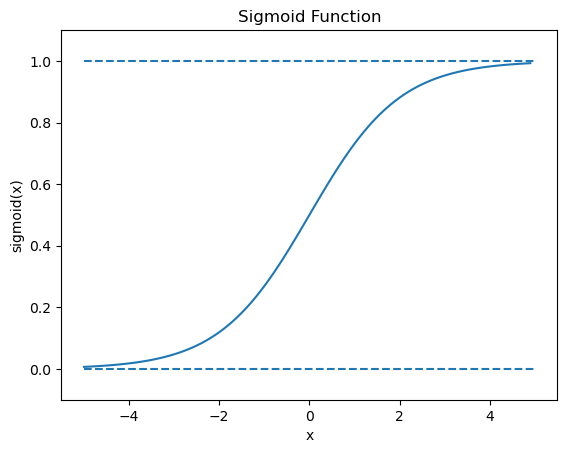

In [4]:
# plot sigmoid function 
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

# define input
x = np.arange(-5.0, 5.0, 0.1)
y = sigmoid(x)

# plot with h-lines on 0 and 1
plt.plot(x, y)
plt.hlines([0, 1], -5, 5, linestyles='dashed')
plt.ylim(-0.1, 1.1)
plt.xlabel('x')
plt.ylabel('sigmoid(x)')
plt.title('Sigmoid Function')
plt.show()


### Derivative of sigmoid function

$$\begin{align*}
g'(z) &= \frac{d}{dz}\frac{1}{1 + e^{-z}} \\
&= \frac{e^{-z}}{(1 + e^{-z})^2} \\
&= \frac{1 + e^{-z} - 1}{(1 + e^{-z})^2} \\
&= g(z) = g(z)^2 \\
&= g(z)(1 - g(z))
\end{align*}
$$